In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bankchurners/BankChurners.csv


# Objective
A business manager of a consumer credit card portfolio is facing the problem of customer attrition. They want to analyze the data to find out the reason behind this and leverage the same to predict customers who are likely to drop off.

# Import basic libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Lets load our dataset and lets explore basic info about dataset

In [5]:
df = pd.read_csv('../input/bankchurners/BankChurners.csv')
df = df[df.columns[:-2]]
df.head()
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

## Our features:
* **CLIENTNUM**: Client number. Unique identifier for the customer holding the account
* **Customer_Age**: Demographic variable - Customer's Age in Years
* **Gender**: Demographic variable - M=Male, F=Female
* **Dependent_count**: Demographic variable - Number of dependents
* **Education_Level**: Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.)
* **Marital_Status**: Demographic variable - Married, Single, Divorced, Unknown
* **Income_Category**: Demographic variable - Annual Income Category of the account holder (<  40K, 40K - 60K,  60K− 80K,  80K− 120K, > $120K, Unknown)
* **Card_Category**: Product Variable - Type of Card (Blue, Silver, Gold, Platinum)
* **Months_on_book**: Period of relationship with bank
* **Total_Relationship_Count**: Total no. of products held by the customer
* **Months_Inactive_12_mon**: No. of months inactive in the last 12 months
* **Contacts_Count_12_mon**: No. of Contacts in the last 12 months
* **Credit_Limit**: Credit Limit on the Credit Card
* **Total_Revolving_Bal**: Total Revolving Balance on the Credit Card
* **Avg_Open_To_Buy**: Open to Buy Credit Line (Average of last 12 months)
* **Total_Amt_Chng_Q4_Q1**: Change in Transaction Amount (Q4 over Q1)
* **Total_Trans_Amt**: Total Transaction Amount (Last 12 months)
* **Total_Trans_Ct**: Total Transaction Count (Last 12 months)
* **Total_Ct_Chng_Q4_Q1**: Change in Transaction Count (Q4 over Q1)
* **Avg_Utilization_Ratio**: Average Card Utilization Ratio


In [6]:
df.describe(include='object')

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,10127,10127,10127,10127
unique,2,2,7,4,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3561,9436


In [7]:
df.describe(exclude='object')

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


,Number,Percent
CLIENTNUM,0,0.000000
Months_Inactive_12_mon,0,0.000000
Total_Ct_Chng_Q4_Q1,0,0.000000
Total_Trans_Ct,0,0.000000
Total_Trans_Amt,0,0.000000
Total_Amt_Chng_Q4_Q1,0,0.000000
Avg_Open_To_Buy,0,0.000000
Total_Revolving_Bal,0,0.000000
Credit_Limit,0,0.000000
Contacts_Count_12_mon,0,0.000000


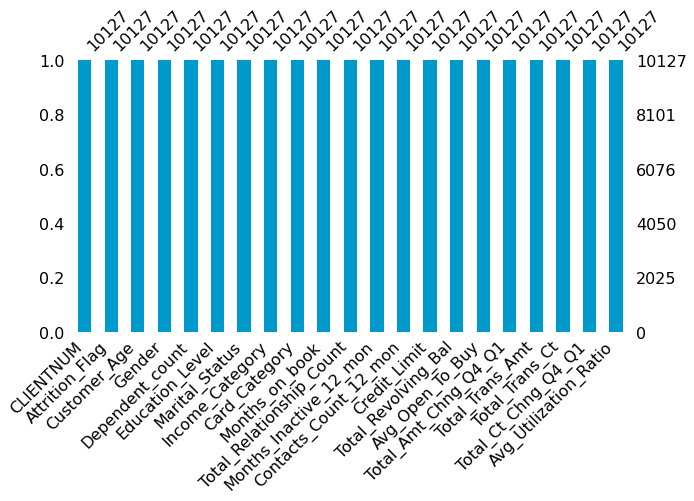

In [8]:
import missingno

missingno.bar(df, figsize=(10,5), color='#0099CC')

def missing_data(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = round((df.isnull().sum()/df.shape[0]*100).sort_values(ascending=False),2)
    return pd.concat([total, percent], axis=1,keys=['Number','Percent']).style.background_gradient(cmap='Blues')
missing_data(df)        

It looks like there is no missing values in our dataset!

# EDA and Feature Relation

## 1) Age of Card Holders

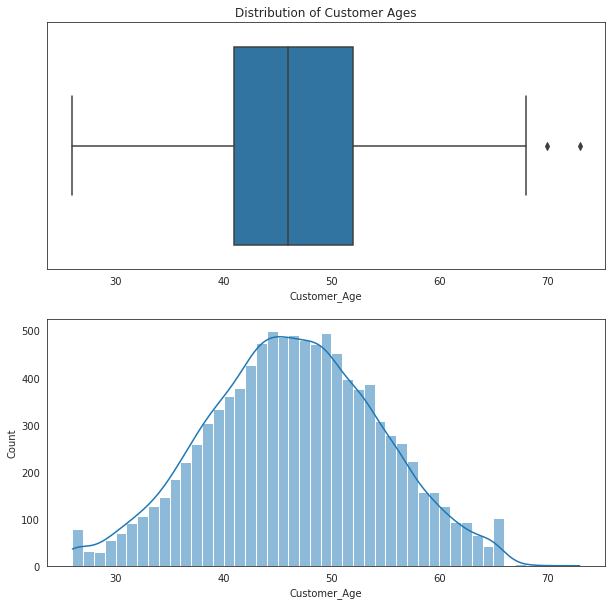

In [9]:
sns.set_style('white')
fig, (axis1, axis2) = plt.subplots(2,1, figsize=(10,10))
axis1 = sns.boxplot(df['Customer_Age'], ax=axis1)
axis1.set_title('Distribution of Customer Ages')
axis2 = sns.histplot(df['Customer_Age'], ax=axis2, kde=True)
plt.show()

* As we can see distribution of our age variable follows a **normal distribution**, further use of this feature can be done with the normality asumption

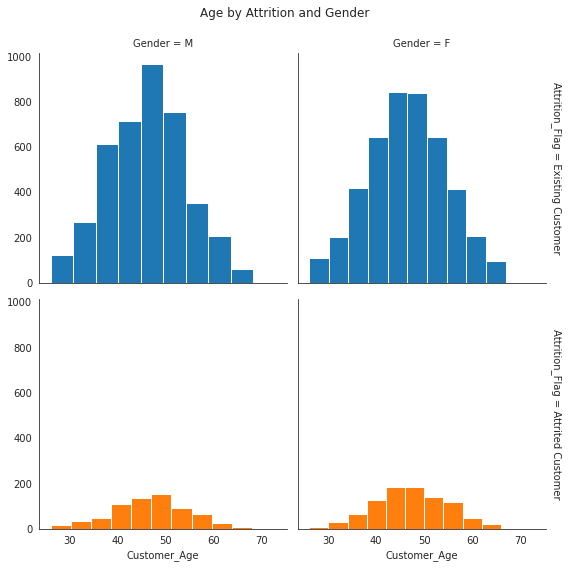

In [10]:
g = sns.FacetGrid(df,col='Gender', size=4, row='Attrition_Flag', margin_titles=True, hue='Attrition_Flag')
g = g.map(plt.hist, 'Customer_Age')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Age by Attrition and Gender')
plt.show()

## 2) Card Holders based on card category

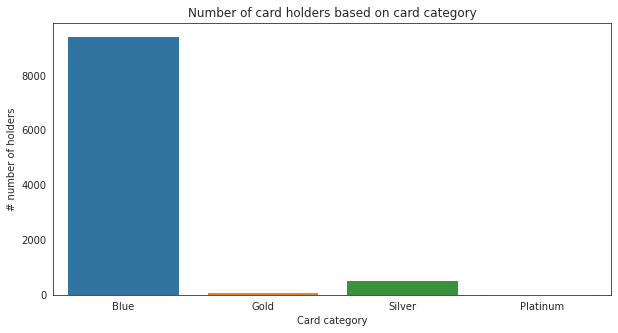

In [11]:
fig = plt.figure(figsize=(10,5))
ax = sns.countplot(data=df, x='Card_Category')
ax.set_title('Number of card holders based on card category')
ax.set_ylabel('# number of holders')
ax.set_xlabel('Card category')
plt.show()

* It looks like there is slighlty more females in our dataset but roughly it is **uniformly distributed** for every card category

## 3) Card Holders based on education level

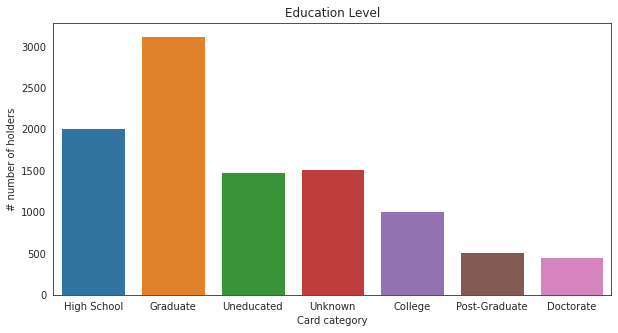

In [12]:
fig = plt.figure(figsize=(10,5))
ax = sns.countplot(data=df, x='Education_Level')
ax.set_title('Education Level')
ax.set_ylabel('# number of holders')
ax.set_xlabel('Card category')
plt.show()

* Most of the card holders are graduates

## 3) Card Holders based on marital status

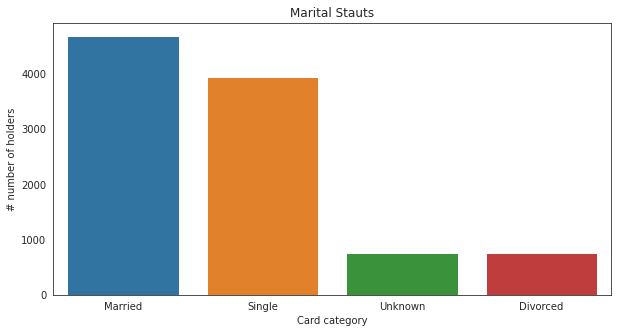

In [13]:
fig = plt.figure(figsize=(10,5))
ax = sns.countplot(data=df, x='Marital_Status')
ax.set_title('Marital Stauts')
ax.set_ylabel('# number of holders')
ax.set_xlabel('Card category')
plt.show()

# Ploting distributions

In [14]:
df['Gender'] = df['Gender'].map({'M':0,'F':1})
df['Attrition_Flag'] = df['Attrition_Flag'].map({'Existing Customer':1,'Attrited Customer':0})


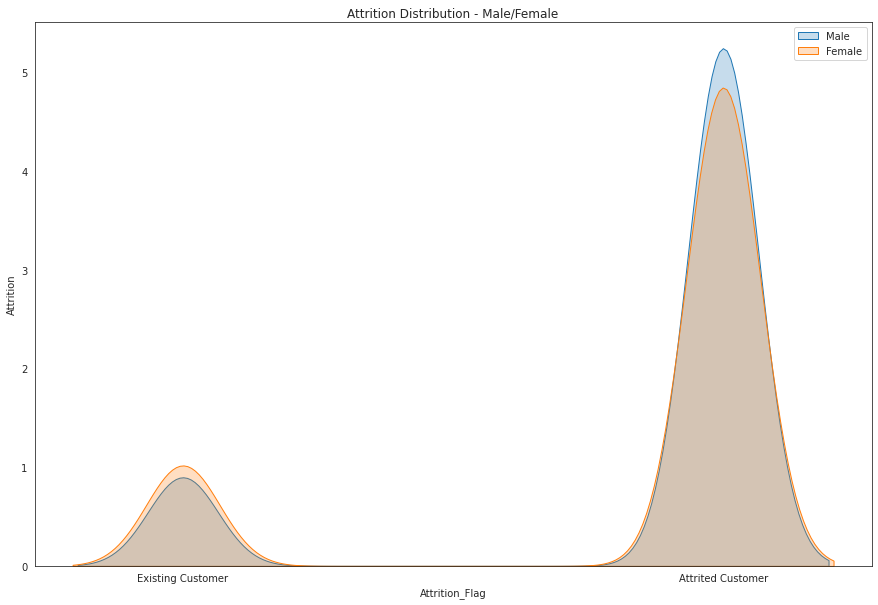

1    0.83934
0    0.16066
Name: Attrition_Flag, dtype: float64


In [15]:
 # Kernel Density Plot
fig = plt.figure(figsize=(15,10),)
ax1=sns.kdeplot(df.loc[df['Gender'] == 0,'Attrition_Flag'],
               shade=True,
               label='Male')
ax2=sns.kdeplot(df.loc[df['Gender'] == 1,'Attrition_Flag'],
               shade=True, 
               label='Female', 
              )
labels = ['Existing Customer','Attrited Customer']
plt.xticks(sorted(df['Attrition_Flag'].unique()), labels)
plt.title('Attrition Distribution - Male/Female')
plt.ylabel('Attrition')
plt.legend()
plt.show()
print(df['Attrition_Flag'].value_counts(normalize=True))

As we can see we have unbalanced dataset, there is much more Attrited Customers than Existing Customers. We will deal with this problem in our **preprocessing step**


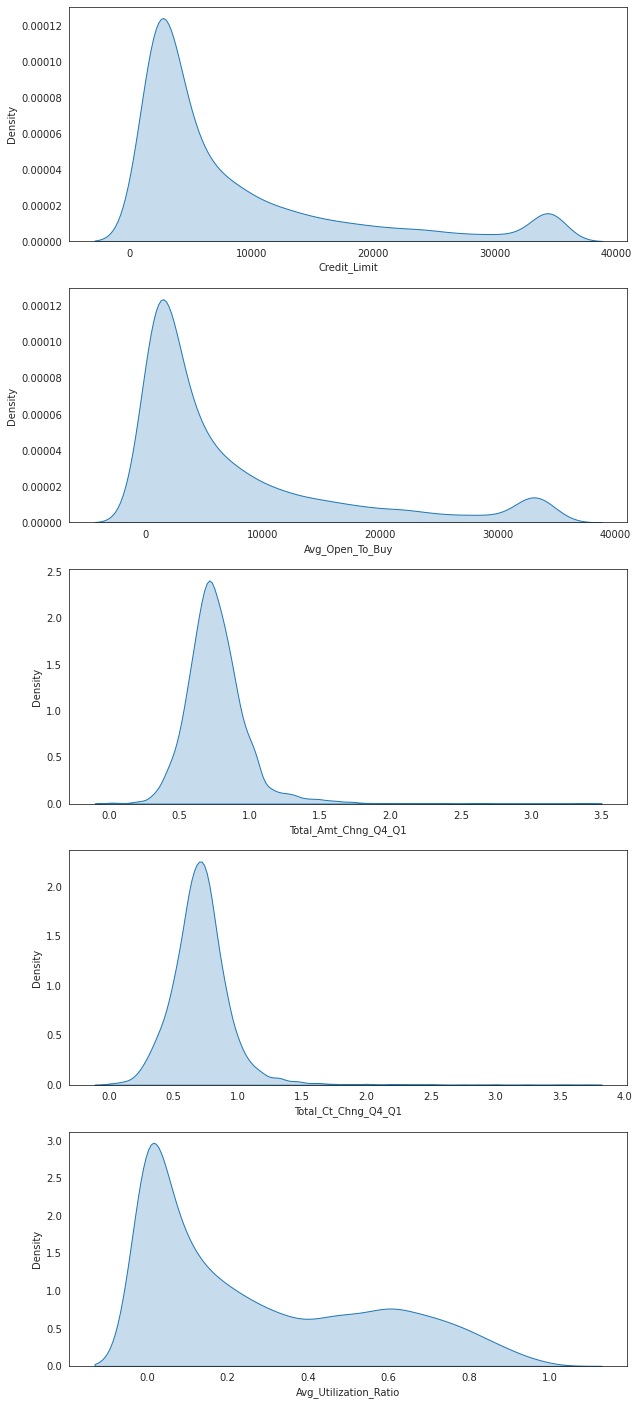

In [16]:
continous_features = df.select_dtypes(['float64']).columns.to_list()
fig, axes = plt.subplots(5,1, figsize=(10,25))
for i,f in enumerate(continous_features):
    ax = sns.kdeplot(df[f], ax=axes[i], shade=True)
#     ax = sns.kdeplot(df.loc[df['Attrition_Flag'] == 0, f], ax=axes[i],shade=True)
#     ax.legend(['Existing Customer','Attrited Customer'])
plt.show()

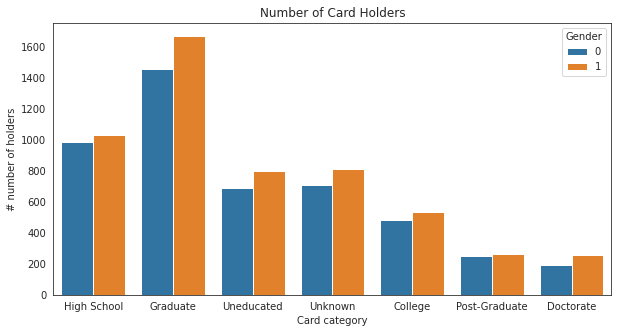

In [17]:
fig = plt.figure(figsize=(10,5))
ax = sns.countplot(data=df, x='Education_Level',hue='Gender')
ax.set_title('Number of Card Holders')
ax.set_ylabel('# number of holders')
ax.set_xlabel('Card category')
plt.show()

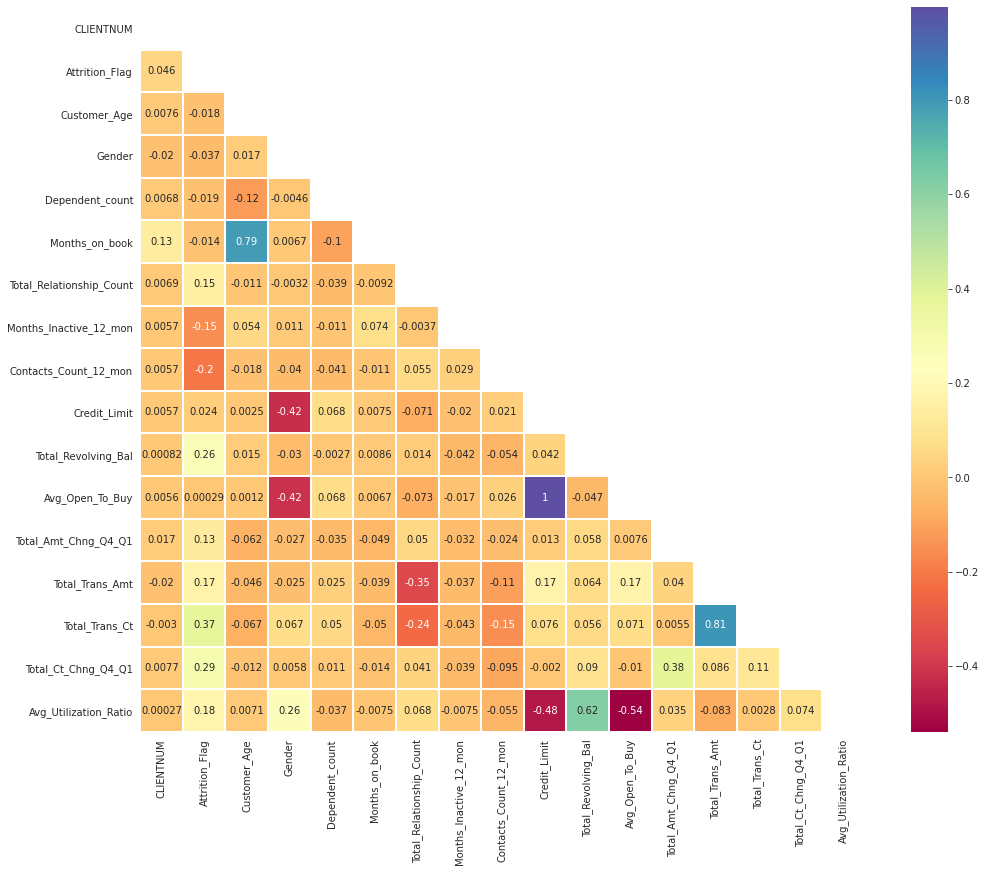

In [18]:
# import numpy as np
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(25/1.5,20/1.5))
sns.heatmap(corr,
           mask=mask,
           cmap='Spectral',
           linewidths=2,
           linecolor='white',
           fmt='.2g',
           annot=True,
           square=True)

plt.show()


In [19]:
from scipy.stats import pearsonr

def show_pvalues_corr(df,sign_level):
    variables = []
    pvalues = []
    for i in df.select_dtypes(exclude='O').columns:
        for n in df.select_dtypes(exclude='O'):
            try:
                r, p = pearsonr(df[i],df[n])
                variables.append(f'{i}/{n}')
                pvalues.append(p)     
            except:
                continue
    variables = pd.Series(variables)
    pvalues = pd.Series(pvalues)

    df_pvalue = pd.concat([variables, pvalues], axis=1)
    df_pvalue.columns = ['Variable','P-value']
    return df_pvalue.loc[df_pvalue['P-value']>=sign_level].drop_duplicates('P-value')

show_pvalues_corr(df,0.5)

,Variable,P-value
7,CLIENTNUM/Months_Inactive_12_mon,0.564336
8,CLIENTNUM/Contacts_Count_12_mon,0.566657
9,CLIENTNUM/Credit_Limit,0.565759
10,CLIENTNUM/Total_Revolving_Bal,0.933882
11,CLIENTNUM/Avg_Open_To_Buy,0.570884
14,CLIENTNUM/Total_Trans_Ct,0.765749
16,CLIENTNUM/Avg_Utilization_Ratio,0.978650
28,Attrition_Flag/Avg_Open_To_Buy,0.977116
43,Customer_Age/Credit_Limit,0.803237
45,Customer_Age/Avg_Open_To_Buy,0.907825


* Above correlation are not significant

# Feature Engineering
Feature engineering is an informal topic, but one that is absolutely known and agreed to be key to success in applied machine learning.
**It is important to remember that we will create new features in such ways that will not cause multicollinearity(when there is a relationship among independent variables) to occur.**

## Education Level / Income Category

In [20]:
df['Education_Level'] = df['Education_Level'].map({'Unknown':0,
                                                  'Uneducated':1,
                                                  'High School':2,
                                                  'College':3,
                                                  'Graduate':4,
                                                  'Post-Graduate':5,
                                                  'Doctorate':6
                                                  })
df['Income_Category'] = df['Income_Category'].map({'Less than $40K':1,
                                                  '$40K - $60K':2,
                                                  '$80K - $120K':3,
                                                  '$60K - $80K':4,
                                                  '$120K +':5,
                                                  'Unknown':0,
                                                  })

# Lets create dummy variables

Generally, a dummy variable is a placeholder for a variable that will be integrated over, summed over, or marginalized.   However, in machine learning, it often describes the individual variables in a one-hot encoding scheme. Thus, dummy or Boolean variables are qualitative variables that can only take the value 0 or 1 to indicate the absence or presence of a specified condition.  These “truth” variables are used to sort data into mutually exclusive categories or to trigger off/on commands.  

**How are Dummy Variables Used in Machine Learning?**
These variables are most often used in regression, latent class analysis or one-hot encodig. They’re also used whenever you’re working with categorical variables that have no quantifiable relationship with each other.

More info [here](https://deepai.org/machine-learning-glossary-and-terms/dummy-variable)

In [21]:
df = pd.get_dummies(df, columns=['Marital_Status','Card_Category'],drop_first = True)
df.drop(['CLIENTNUM'],axis=1, inplace=True)

We have to use drop_first = True in order to avoid multicollinearity
1. **Multicollinearity** refers to a condition in which the independent variables are correlated to each other. Multicollinearity can cause problems when you fit the model and interpret the results. The variables of the dataset should be independent of each other to overdue the problem of multicollinearity.

1. To avoid or remove **multicollinearity** in the dataset after one-hot encoding using pd.get_dummies, you can drop one of the categories and hence removing collinearity between the categorical features. Sklearn provides this feature by including drop_first=True in pd.get_dummies.

**Example**:
For example, if you have a variable gender, you don't need both a male and female dummy. If male=1 then the person is a male and if male=0 then the person is female. For the presence of hundreds of categories, dropping the first column does not affect much.

# Lets use SMOTE for imbalanced datasets

**Imbalanced classification** involves developing predictive models on classification datasets that have a severe class imbalance.

The challenge of working with imbalanced datasets is that most machine learning techniques will ignore, and in turn have poor performance on, the minority class, although typically it is performance on the minority class that is most important.

One approach to addressing imbalanced datasets is to oversample the minority class. The simplest approach involves duplicating examples in the minority class, although these examples don’t add any new information to the model. Instead, new examples can be synthesized from the existing examples. This is a type of data augmentation for the minority class and is referred to as the **Synthetic Minority Oversampling Technique**, or SMOTE for short.
[More info](https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/)

In [22]:
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

counter = Counter(df['Attrition_Flag'])
print(counter)

X = df.iloc[:,1:]
y = df.iloc[:,:1]

over = SMOTE(sampling_strategy='auto')
# under = RandomUnderSampler(0.5)

# steps = [('o', over), ('u', under)]
# pipeline = Pipeline(steps=steps)

X,y = over.fit_resample(X,y)

Counter({1: 8500, 0: 1627})


## Spliting training data and feature scaling

Feature scaling: **The first question we need to address – why do we need to scale the variables in our dataset**? Some machine learning algorithms are sensitive to feature scaling while others are virtually invariant to it.

* **Gradien Decent Based Algorithms:** Gradient Descent Based Algorithms
Machine learning algorithms like linear regression, logistic regression, neural network, etc. that use gradient descent as an optimization technique require data to be scaled. The presence of feature value X in the formula will affect the step size of the gradient descent. **The difference in ranges of features will cause different step sizes for each feature.** To ensure that the gradient descent moves smoothly towards the minima and that the steps for gradient descent are updated at the same rate for all the features, we scale the data before feeding it to the model.

* **Distance-Based Algorithms**: Distance algorithms like KNN, K-means, and SVM are most affected by the range of features. This is because behind the scenes they are using distances between data points to determine their similarity.

* **Tree-Based Algorithms**: Tree-based algorithms, on the other hand, are fairly insensitive to the scale of the features. Think about it, a decision tree is only splitting a node based on a single feature. The decision tree splits a node on a feature that increases the homogeneity of the node. This split on a feature is not influenced by other features.  So, there is virtually no effect of the remaining features on the split. This is what makes them invariant to the scale of the features!

**In this case we will use standardization**: Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation. 

**Standardization**, can be helpful in cases where the data follows a Gaussian distribution. However, this does not have to be necessarily true. Also, unlike normalization, standardization does not have a bounding range. So, even if you have outliers in your data, they will not be affected by standardization

[More info here](http://https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/)



In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

#store columns and headers
columns_headers = X_train.columns

In [24]:
from sklearn.preprocessing import StandardScaler

stdc = StandardScaler()
X_train = stdc.fit_transform(X_train)
X_test = stdc.fit_transform(X_test)

pd.DataFrame(X_train, columns=columns_headers)

,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,...,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0.651444,1.054598,-0.175905,-0.877582,-0.649803,0.290348,0.363420,-1.475277,-0.498133,0.129679,...,-0.911256,-1.550036,4.704821,-0.107935,-0.737055,-0.671202,-0.217814,-0.093896,-0.03432,-0.204124
1,-0.028990,-0.948229,0.645953,0.358815,-0.649803,-0.925251,-0.962158,-0.383091,0.468406,-0.600342,...,-0.586048,-0.831636,-0.798708,-0.825892,-0.737055,1.489865,-0.217814,-0.093896,-0.03432,-0.204124
2,1.467964,-0.948229,-0.997764,-1.495780,-1.371873,-0.114852,-1.624947,0.709095,0.468406,-0.561540,...,-0.702951,-1.550036,-1.654552,-0.825892,1.356751,-0.671202,-0.217814,-0.093896,-0.03432,-0.204124
3,0.379270,1.054598,0.645953,0.977013,-1.371873,0.155281,0.363420,0.709095,1.434946,0.970905,...,-0.103204,0.335766,0.779814,-0.714609,-0.737055,1.489865,-0.217814,-0.093896,-0.03432,-0.204124
4,0.243183,1.054598,-0.175905,0.977013,-0.649803,0.695547,0.363420,0.709095,0.468406,-0.717743,...,-0.458217,-0.562235,-0.995769,0.437150,-0.737055,1.489865,-0.217814,-0.093896,-0.03432,-0.204124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11895,-2.206377,-0.948229,-1.819622,-1.495780,1.516408,-2.140849,-1.624947,0.709095,0.468406,1.672016,...,3.076349,2.086867,0.426095,-0.621274,-0.737055,1.489865,-0.217814,-0.093896,-0.03432,-0.204124
11896,0.515357,-0.948229,-0.997764,0.977013,0.072268,-0.114852,-0.962158,0.709095,0.468406,0.044305,...,-0.357211,-0.472435,0.584506,-0.082712,-0.737055,-0.671202,-0.217814,-0.093896,-0.03432,-0.204124
11897,0.651444,-0.948229,0.645953,0.358815,2.238479,0.560481,-0.299369,0.709095,-0.498133,2.847567,...,3.414472,2.805268,0.553945,-0.671531,1.356751,-0.671202,-0.217814,-0.093896,-0.03432,-0.204124
11898,0.651444,1.054598,-0.175905,-0.877582,-0.649803,0.155281,-0.962158,0.709095,0.468406,-0.714724,...,-0.510873,-0.786736,-0.360680,1.882137,-0.737055,1.489865,-0.217814,-0.093896,-0.03432,-0.204124


# 1. Logistic regression

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, accuracy_score
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score

X = stdc.fit_transform(X)
cv = StratifiedShuffleSplit(n_splits=10, test_size=0.25, random_state=0)
accuracies = cross_val_score(LogisticRegression(solver='liblinear'), X, y, cv=cv)

print(f'Cross-Validation accuracy scores: {accuracies}','\n')
print(f'Mean Cross-Validation score: {round(accuracies.mean(),4)}')

Cross-Validation accuracy scores: [0.90023529 0.88211765 0.89435294 0.88047059 0.88870588 0.88494118
 0.88988235 0.88941176 0.88941176 0.88494118] 

Mean Cross-Validation score: 0.8884


In [26]:
from sklearn.model_selection import GridSearchCV

C_vals = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
solvers= ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
cv = StratifiedShuffleSplit(n_splits=10, test_size=0.25)
params = {'C': C_vals,
         'solver':solvers}

lgr = LogisticRegression()

grid = GridSearchCV(estimator=lgr,
                   param_grid=params, 
                   scoring='accuracy',
                   n_jobs = -1,
                   cv = cv)

grid.fit(X,y)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=None, test_size=0.25,
            train_size=None),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [27]:
print(grid.best_estimator_)
print(grid.best_score_)
print(grid.best_params_)

lgr_grid = grid.best_estimator_
y_lgr_predict = lgr_grid.predict(X_test)

LogisticRegression(C=0.1, solver='newton-cg')
0.8881411764705882
{'C': 0.1, 'solver': 'newton-cg'}


## Lets evaluate our model
There is multiple way how to evaluate our model, we can use:
* Confustion Matrix
* ROC
* AUC

Lets start with **confusion matrix**:

Confusion matrix is a very popular measure used while solving  classification problems. It can be applied to binary classification as well as for multiclass classification problems. 

Confusion matrices represent counts from **predicted and actual values**. The output “TN” stands for True Negative which shows the number of negative examples classified accurately. Similarly, “TP” stands for True Positive which indicates the number of positive examples classified accurately. The term “FP” shows False Positive value, i.e., the number of actual negative examples classified as positive; and “FN” means a False Negative value which is the number of actual positive examples classified as negative. One of the most commonly used metrics while performing classification is **accuracy**. (Accuracy can be misleading if used with imbalanced datasets, and therefore there are other metrics based on confusion matrix which can be useful for evaluating performance.)

,Predicted - Attrited Customer,Predicted - Existing Customer
Actual - Attrited Customer,2263,286
Actual - Existing Customer,295,2256


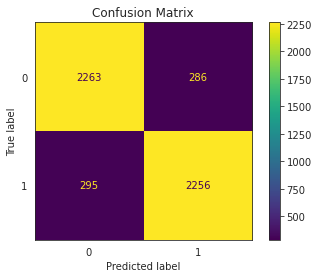

In [28]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

def create_cf(y_test, y_predicted, normalized = False):
    
    cm = confusion_matrix(y_test, y_predicted)
    
    if normalized:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        matr = pd.DataFrame(confusion_matrix(y_test, y_predicted), columns=['Predicted - Attrited Customer', 'Predicted - Existing Customer'],
                        index=['Actual - Attrited Customer', 'Actual - Survived'])
        cf = ConfusionMatrixDisplay(cm).plot()
        plt.title('Normalized')
        return matr
    else:
        matr = pd.DataFrame(cm, columns=['Predicted - Attrited Customer', 'Predicted - Existing Customer'],
                        index=['Actual - Attrited Customer', 'Actual - Existing Customer'])
        cf = ConfusionMatrixDisplay(cm).plot()
        plt.title('Confusion Matrix')
        return matr
    plt.show()

create_cf(y_test, y_lgr_predict, normalized = False)                 

In [29]:
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score

def our_score(y_test, y_predicted):
    ac = accuracy_score(y_test, y_predicted)*100
    re = recall_score(y_test, y_predicted)*100
    pr = precision_score(y_test, y_predicted)*100
    f = f1_score(y_test, y_predicted)*100
    series = pd.Series([ac,re,pr, f], index = ['Accuracy','Recall','Precission', 'F1-Score'])
    return pd.DataFrame(series, columns=['Score'])
our_score(y_test, y_lgr_predict)

,Score
Accuracy,88.607843
Recall,88.435907
Precission,88.749017
F1-Score,88.592185


# Support Vector Machines

In this case we will use also **randomized GridSearch** to find optimal values for hyperparameters:

* **Random search**: set up a grid of hyperparameter values and select random combinations to train the model and score. The number of search iterations is set based on time/resources.

* Grid search spends too much time evaluating unpromising regions of the hyperparameter search space because it has to evaluate every single combination in the grid. Random search in contrast, does a better job of exploring the search space and therefore can usually find a good combination of hyperparameters in far fewer iterations.

In [30]:
# from sklearn.model_selection import RandomizedSearchCV

# from sklearn.svm import SVC
# Cs = [0.001, 0.01, 0.1, 1,1.5,2,2.5,3] ## penalty parameter C for the error term. 
# gammas = [0.0001,0.001, 0.01, 0.1, 1]
# param_grid = {'C': Cs, 'gamma' : gammas}
# cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)
# grid_search = RandomizedSearchCV(SVC(kernel = 'rbf', probability=True), param_distributions = param_grid,cv=cv,verbose = False, n_jobs=-1, n_iter=40) ## 'rbf' stands for gaussian kernel
# grid_search.fit(X,y)

In [31]:
# print(grid_search.best_score_)
# print(grid_search.best_params_)
# print(grid_search.best_estimator_)

# Random Forrest Classifier

**Random forest** is an ensemble machine learning algorithm.

It is perhaps the most popular and widely used machine learning algorithm given its good or excellent performance across a wide range of classification and regression predictive modeling problems. It is also easy to use given that it has few key hyperparameters and sensible heuristics for configuring these hyperparameters.

* **This algorithm makes decision trees susceptible to high variance if they are not pruned.**

[More info](https://machinelearningmastery.com/random-forest-ensemble-in-python/)

In [32]:
from sklearn.ensemble import RandomForestClassifier

n_estimators = [10,30,50,70,80,150,160];
cv = StratifiedShuffleSplit(n_splits=10, test_size=0.3, random_state=15)

n_estimators = [140,145,150,155];
max_depth = range(1,5);
criterions = ['gini', 'entropy'];

params = {'n_estimators':n_estimators,
              'max_depth':max_depth,
              'criterion': criterions
             }
grid = GridSearchCV(RandomForestClassifier(max_features='auto'),param_grid = params, cv=cv, n_jobs= -1)
grid.fit(X,y)


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 5),
                         'n_estimators': [140, 145, 150, 155]})

In [33]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.9032156862745099
{'criterion': 'gini', 'max_depth': 4, 'n_estimators': 145}
RandomForestClassifier(max_depth=4, n_estimators=145)


# KNN-Classifier

**K Nearest Neighbor(KNN**) is a very simple, easy to understand, versatile and one of the topmost machine learning algorithms. 

The simple version of the K-nearest neighbor classifier algorithms is to predict the target label by finding the nearest neighbor class. The closest class will be identified using the distance measures like Euclidean distance.

In [35]:
from sklearn.neighbors import KNeighborsClassifier

k_range = range(1,25)
weights_options = ['uniform','distance']

params = {'n_neighbors':k_range,
         'weights':weights_options}

cv = StratifiedShuffleSplit(n_splits=10, random_state=10)

grid = GridSearchCV(KNeighborsClassifier(), cv=cv, param_grid=params, verbose=False, n_jobs=-1)
grid.fit(X,y)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=10, test_size=None,
            train_size=None),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 25),
                         'weights': ['uniform', 'distance']},
             verbose=False)

In [36]:
print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

0.9356470588235295
{'n_neighbors': 4, 'weights': 'distance'}
KNeighborsClassifier(n_neighbors=4, weights='distance')


# Bagging Classifier

In [37]:
from sklearn.ensemble import BaggingClassifier
n_estimators = [10,30,50,70,80,150,160, 170,175,180,185];
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)

parameters = {'n_estimators':n_estimators,
              
        }
grid = GridSearchCV(BaggingClassifier(base_estimator= None, ## If None, then the base estimator is a decision tree.
                                      bootstrap_features=False),
                                 param_grid=parameters,
                                 cv=cv,
                                 n_jobs = -1)
grid.fit(X,y)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
             estimator=BaggingClassifier(), n_jobs=-1,
             param_grid={'n_estimators': [10, 30, 50, 70, 80, 150, 160, 170,
                                          175, 180, 185]})

In [38]:
print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

0.9694313725490197
{'n_estimators': 180}
BaggingClassifier(n_estimators=180)


# **END!**